<a href="https://colab.research.google.com/github/bloomfieldfong/Stadistical-Learning/blob/main/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tarea I - Gradient Descent con Tensorflow**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
file = "proyecto_training_data.npy"
raw_data = np.load(file)
header = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
data = pd.DataFrame(raw_data,columns=header)

Se establecio un correlativo para cada una de las columnas de nuestro data frame y se tomaron las variables con mayor correlacion (0.79): 

1. SalePrice
2. OverallQual

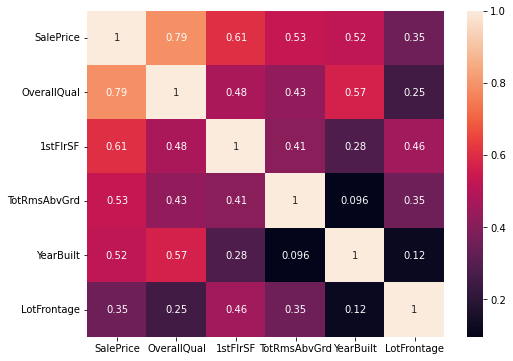

In [4]:
correlation_table = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True)
plt.show()

Las variables con mayor correlacion son: SalePrice y OverallQuality


In [5]:
salePrice = raw_data[:,1]
overallQuality = raw_data[:,0]

## **Hipotesis**




Se identifico una relación entre las variables *SalePrice* y *OverallQuality*, se estara definiendo una relacion lineal donde la variable de predicción **y** sera el precio de venta de una casa y su variable **x** la calidad de la misma y sus pesos seran la pendiente de la recta y su intercepto. Para el calculo de este modelo se estara utilizando Tensorflow.


In [23]:
def modelo(x,y, epochs, imprimir_error_cada, lr):
  #MB = [[0.0], [0.0]] variables m y b 
  mb = tf.Variable(name="mb", initial_value=tf.zeros((2,1),tf.float64))
  #Reshape el valor de y 
  y = y.reshape(len(y), 1)
  #Reshape el valor x a una lista  con 1s [y,1] para operaciones matriciales
  x = x.reshape(len(x), 1)
  x = tf.concat([x, tf.ones_like(x)], axis=1)
  errores = []
  mbs = []
  #Recorre en cantidad de epochs
  for i in range(epochs):
    with tf.GradientTape() as grad_tape:
      #Multiplicacion matricial para crear la prediccion de y 
      y_pred = tf.matmul(x,mb)
      #Calculo del error
      error = 1/2 * tf.reduce_mean(tf.math.square(y - y_pred))
    #Calculo de la gradiente
    grad_mb = grad_tape.gradient(error, mb)
    #Re-asignar la nueva m y b 
    mb.assign(mb-lr*grad_mb[0])
    #Errores
    errores.append(error.numpy())
    mbs.append(mb.numpy())
    
    if ((i+1) % imprimir_error_cada) == 0:
      print("Error Iteracion: "+ str(i+1)+" "+str(errores[i]))
      print("    modelo:y={}x+{}".format(mbs[i][0],mbs[i][1]))

## Modelo 1: 



*   Epochs: 300
*   Lr: 0.001

Imprime el error y la recta cada: 10

In [24]:
modelo(salePrice, overallQuality, 300, 30, 0.001)

Error Iteracion: 30 2744894168.0623426
    modelo:y=[19756.97456458]x+[19756.97456458]
Error Iteracion: 60 1614208046.067211
    modelo:y=[24687.85550215]x+[24687.85550215]
Error Iteracion: 90 1549570978.031656
    modelo:y=[25918.4886004]x+[25918.4886004]
Error Iteracion: 120 1546990307.8244054
    modelo:y=[26225.62597436]x+[26225.62597436]
Error Iteracion: 150 1547190319.401112
    modelo:y=[26302.28031319]x+[26302.28031319]
Error Iteracion: 180 1547292814.5681276
    modelo:y=[26321.41145176]x+[26321.41145176]
Error Iteracion: 210 1547321669.9162924
    modelo:y=[26326.18613861]x+[26326.18613861]
Error Iteracion: 240 1547329075.5307403
    modelo:y=[26327.37778929]x+[26327.37778929]
Error Iteracion: 270 1547330936.506032
    modelo:y=[26327.67519756]x+[26327.67519756]
Error Iteracion: 300 1547331401.7536025
    modelo:y=[26327.74942375]x+[26327.74942375]


## Modelo 2: 



*   Epochs: 1000
*   Lr: 0.005

Imprime el error y la recta cada: 100

In [28]:
modelo(salePrice, overallQuality, 1000, 100, 0.005)

Error Iteracion: 100 1547331556.5547729
    modelo:y=[26327.77410979]x+[26327.77410979]
Error Iteracion: 200 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 300 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 400 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 500 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 600 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 700 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 800 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 900 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 1000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]


## Modelo 3: 



*   Epochs: 10000
*   Lr: 0.001

Imprime el error y la recta cada: 1000

In [29]:
modelo(salePrice, overallQuality, 10000, 1000, 0.001  )

Error Iteracion: 1000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 2000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 3000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 4000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 5000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 6000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 7000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 8000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 9000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]
Error Iteracion: 10000 1547331556.5562847
    modelo:y=[26327.77410998]x+[26327.77410998]


## Modelo 4: 



*   Epochs: 1000
*   Lr: 0.1

Imprime el error y la recta cada: 100

In [31]:
modelo(salePrice, overallQuality, 1000, 100, 0.1)

Error Iteracion: 100 3.1912202441338077e+118
    modelo:y=[-1.22995423e+59]x+[-1.22995423e+59]
Error Iteracion: 200 6.964763837345768e+227
    modelo:y=[-5.74597536e+113]x+[-5.74597536e+113]
Error Iteracion: 300 inf
    modelo:y=[-2.68434646e+168]x+[-2.68434646e+168]
Error Iteracion: 400 inf
    modelo:y=[-1.25404574e+223]x+[-1.25404574e+223]
Error Iteracion: 500 inf
    modelo:y=[-5.85852361e+277]x+[-5.85852361e+277]
Error Iteracion: 600 nan
    modelo:y=[nan]x+[nan]
Error Iteracion: 700 nan
    modelo:y=[nan]x+[nan]
Error Iteracion: 800 nan
    modelo:y=[nan]x+[nan]
Error Iteracion: 900 nan
    modelo:y=[nan]x+[nan]
Error Iteracion: 1000 nan
    modelo:y=[nan]x+[nan]


## Conclusiones



*   Como podemos observar en el modelo 4, al tener un learning rate bajo (0.1) tendemos a irnos con un error bastante grande y los pesos de x y y tornan a negativo.
*   El mejor modelo es el modelo 1 ya que el error se reduce y se estabiliza. Ademas que las predicciones se asemejan a sus valores reales concluyendo que esta es una buena funcion.

Intente utilizar tensorboard pero tuve que regresar un par de versiones de mi notebook por que todo dejo de funcionar :( seguire investigando como utilizar la herramienta

